#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [41]:
import json
import re
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

words = {}

stemmed_documents = []

stemmer_lookup = {}

with open('training_data.json') as input_file:
    for line_idx, input_line in enumerate(input_file):
        review_item = json.loads(input_line)
        review_text = review_item['text']
        
        text_words = [w for w in re.split('\W+', review_text) if len(w) > 0]
        
        document = []
        
        for w in text_words:
            stemmed = ''
            
            lower = w.lower()
            if lower in stemmer_lookup:
                stemmed = stemmer_lookup[lower]
            else:
                stemmed = stemmer.stem(w.lower())
                stemmer_lookup[lower] = stemmed
            
            document.append(stemmed)
            
            if stemmed in words:
                words[stemmed] += 1
            else:
                words[stemmed] = 1
                
        stemmed_documents.append(' '.join(document))
        
print words
print len(stemmed_documents)

{u'fawn': 7, u'circuitri': 1, u'fawk': 1, u'mustachio': 2, u'woodi': 13, u'sonja': 1, u'alphagraph': 2, u'suzann': 13, u'francesco': 1, u'francesca': 4, u'northsight': 1, u'nieder': 1, u'aileen': 1, u'scold': 19, u'accret': 1, u'crespel': 2, u'reclean': 3, u'spagehetti': 2, u'calpico': 5, u'sharehold': 2, u'astrick': 1, u'gallach': 17, u'pigment': 3, u'capoeira': 1, u'lagamio': 1, u'lidocain': 1, u'viewabl': 2, u'elvi': 18, u'airfar': 1, u'broiler': 6, u'wooden': 71, u'showcas': 46, u'understock': 1, u'wednesday': 279, u'tcbi': 9, u'crotch': 6, u'candrea': 1, u'vermietst': 2, u'tumer': 1, u'scraper': 3, u'271': 2, u'273': 1, u'sooth': 54, u'275': 3, u'sh1t': 1, u'pleeeeeeaaaassseee': 1, u'dialogu': 5, u'succumb': 6, u'shure': 9, u'widget': 2, u'perfunctorili': 1, u'crouch': 2, u'nachfrag': 1, u'wheatgrass': 2, u'tiffiani': 1, u'karibu': 1, u'friendlyish': 1, u'ching': 25, u'china': 267, u'chinc': 1, u'wagyu': 5, u'doublecharg': 1, u'chino': 2, u'moddern': 1, u'deterior': 17, u'naturel'

In [6]:
# Write words to a file so that we don't have to run the extraction every time

import json

with open('intermediate_data/words.json', 'w') as words_file:
    words_file.write(json.dumps(words))

In [1]:
# read words from the saved file

import json

words = {}

with open('intermediate_data/words.json', 'r') as words_file:
    words = json.loads(words_file.read())
    
print 'Finished reading ' + str(len(words.keys())) + ' words'

Finished reading 36555 words


### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [2]:
# your code here

print 'number of unique tokens ' + str(len(words))

number of unique tokens 36555


### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [7]:
# your code here

items = words.items()
items.sort(key=lambda w : -w[1])

print "Rank\tToken\tCount"

for i in xrange(20):
    print str(i + 1) + "\t" + items[i][0] + "\t" + str(items[i][1])

Rank	Token	Count
1	the	246309
2	i	168931
3	and	168589
4	a	134904
5	to	128139
6	it	78867
7	of	76237
8	wa	74020
9	is	63496
10	for	60867
11	in	60523
12	that	50804
13	my	50565
14	you	45881
15	they	43635
16	thi	39940
17	with	39340
18	have	39082
19	but	37967
20	on	35388


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

Text(0,0.5,u'Y-axis')

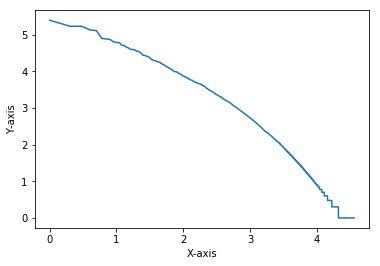

In [8]:
# your code here

%matplotlib inline  

import matplotlib.pyplot as plt
import math

plotted_items = items

x = [math.log(rank + 1, 10) for rank in range(len(plotted_items))]
y = [math.log(item[1], 10) for item in plotted_items]

dataset_1, = plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# plt.legend([dataset_1, dataset_2], ["Alice", "Bob"], loc=4)

What do you observe? Is this consistent with Zipf's law?

This figure has the same shape as the figure in Figure 5.2 of the textbook. This is consistent with the Zipf's Law.

## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [15]:
# For performance concerns during feature extraction and classification, we ignore words that only 
# appeared once in the entire dataset (as they can't be in both training and testing datasets
# and therefore won't make a difference to the classification result)

# reappearing_words = {word: count for word, count in words.items() if count > 1}
# print len(reappearing_words.keys())

21186


In [60]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer()

# count_fit = count_vect.fit_transform(stemmed_documents)


In [96]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()

# X_train_tfidf = tfidf_transformer.fit_transform(count_fit)

# print X_train_tfidf.shape

# from sklearn import tree

# dt = tree.DecisionTreeClassifier()
# dt.fit(X_train_tfidf, results)

(40000, 36518)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# your code

import json
import re
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

word_list = words.keys()
word_list.sort()

vector_size = len(word_list)

feature_vectors = []
results = []

stemmer_lookup = {}
index_lookup = {}

with open('training_data.json') as input_file:
    for line_idx, input_line in enumerate(input_file):
        if line_idx % 1000 == 0:
            print 'Progress: ' + str(line_idx)
            
        review_item = json.loads(input_line)
        review_text = review_item['text']
        
        text_words = [w for w in re.split('\W+', review_text) if len(w) > 0]
        
        vector = [0] * vector_size
        
        for w in text_words:
            lower = w.lower()
            
            stemmed = ''
            
            # cache the computed stem and vector index to speed up extraction
            if lower in stemmer_lookup:
                stemmed = stemmer_lookup[lower]
            else:
                stemmed = stemmer.stem(lower)
                stemmer_lookup[lower] = stemmed
            
            vector_idx = 0
            
            if stemmed in index_lookup:
                vector_idx = index_lookup[stemmed]
            else:
                if stemmed in word_list:
                    vector_idx = word_list.index(stemmed)
                    index_lookup[stemmed] = vector_idx
                else:
                    # word from the document not in the word list because it is ignored (due to low frequency, etc)
                    continue

            vector[vector_idx] += 1
                
        feature_vectors.append(vector)
        is_food_relevant = 1 if (review_item['label'] == 'Food-relevant') else -1
        
        results.append(is_food_relevant)
        
print 'Completed: ' + str(len(feature_vectors)) + ' items'

Progress: 0
Progress: 1000
Progress: 2000
Progress: 3000
Progress: 4000
Progress: 5000
Progress: 6000
Progress: 7000
Progress: 8000
Progress: 9000
Progress: 10000
Progress: 11000
Progress: 12000
Progress: 13000
Progress: 14000
Progress: 15000
Progress: 16000
Progress: 17000
Progress: 18000
Progress: 19000
Progress: 20000
Progress: 21000
Progress: 22000
Progress: 23000
Progress: 24000
Progress: 25000
Progress: 26000
Progress: 27000
Progress: 28000
Progress: 29000
Progress: 30000
Progress: 31000
Progress: 32000
Progress: 33000
Progress: 34000
Progress: 35000
Progress: 36000
Progress: 37000
Progress: 38000
Progress: 39000
Completed: 40000 items


In [15]:
# Write feature vectors to a file so that we don't have to run the extraction every time
with open('intermediate_data/feature_vectors.json', 'w') as fv_file:
    fv_file.write(json.dumps(feature_vectors))

## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [4]:
# your code here...plus add cells for reporting your results
# import math

# total_doc_count = len(stemmed_documents)
# training_doc_count = int(math.floor(total_doc_count * 0.7))

# training_docs = stemmed_documents[:training_doc_count]
# training_results = results[:training_doc_count]

# test_docs = stemmed_documents[training_doc_count + 1:]
# test_results = results[training_doc_count + 1:]

# print 'Completed'

# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(count_fit)

# print X_train_tfidf.shape

# from sklearn import tree

# dt = tree.DecisionTreeClassifier()
# dt.fit(X_train_tfidf, results)


NameError: name 'stemmed_documents' is not defined

In [118]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn import tree

# count_vect = CountVectorizer()
# transformer = TfidfTransformer(use_idf=False)

# count_fit = count_vect.fit_transform(training_docs)

# print 'count fit ready'

# X_train_tfidf = transformer.fit_transform(count_fit)

# print 'idf ready'
# dt = tree.DecisionTreeClassifier()
# dt.fit(X_train_tfidf, training_results)

# print 'fitted'

count fit ready
idf ready
fitted


In [120]:
# test_count_fit = count_vect.transform(test_docs)

# test_tfidf = transformer.transform(test_count_fit)

# print X_train_tfidf.shape
# print test_tfidf.shape
# dt.predict(test_tfidf)

# dt.predict()

(27999, 30161)
(12000, 20138)


ValueError: Number of features of the model must match the input. Model n_features is 30161 and input n_features is 20138 

In [23]:
# your code here...plus add cells for reporting your results
import math

total_data_size = len(feature_vectors)

training_data_size = int(math.floor(total_data_size * 0.7))

print 'training data size: ' + str(training_data_size)

training_vectors = feature_vectors[:training_data_size - 1]
training_results = results[:training_data_size - 1]

print 'training data ready'

test_vectors = feature_vectors[training_data_size:]
test_results = results[training_data_size:]

print 'test data ready'


training data size: 28000
training data ready
test data ready


In [24]:
from scipy.sparse import csr_matrix

training_csr = csr_matrix(training_vectors)
test_csr = csr_matrix(test_vectors)

print 'Completed'

Completed


In [32]:
# from sklearn.feature_extraction.text import TfidfTransformer

# transformer = TfidfTransformer(use_idf=False)
# training_tfidf = transformer.fit_transform(training_csr)

def classify(classifier):
    print 'Classification begins'
    
    classifier.fit(training_vectors, training_results)
    print 'Fitting completed'
    
    predict_results = classifier.predict(test_vectors)

    correct_predict_count = 0
    
    for i in xrange(len(test_results)):
        if test_results[i] == predict_results[i]:
            correct_predict_count += 1
            
    print "Accuracy: " + str(correct_predict_count) + " out of " + str(len(test_results))

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classify(KNeighborsClassifier(n_neighbors=1))

Classification begins
Fitting completed
Accuracy: 4960 out of 12000


In [26]:
from sklearn.tree import DecisionTreeClassifier

classify(DecisionTreeClassifier())

Classification begins
Fitting completed
Accuracy: 9215 out of 12000


In [33]:
from sklearn.naive_bayes import MultinomialNB

classify(MultinomialNB())

Classification begins
Fitting completed
Accuracy: 11248 out of 12000


In [29]:
from sklearn.svm import SVC

classify(SVC())

Classification begins
Fitting completed
Accuracy: 2906 out of 12000


## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

*add your discussion here*

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

In [18]:
# your code here ... add as many cells as you need for features, results, and discussion.

### BONUS: What are the most informative features in distinguishing these two classes?

In [19]:
# Your code here

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

*add your results and discussion here*


## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

### *add your results and discussion here*

## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*